In [2]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import statistics as stats

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/256x192x128/vizdump'
filename_prefix = directory+'/shearlayer_'

reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
x, y, z = reader.readCoordinates()


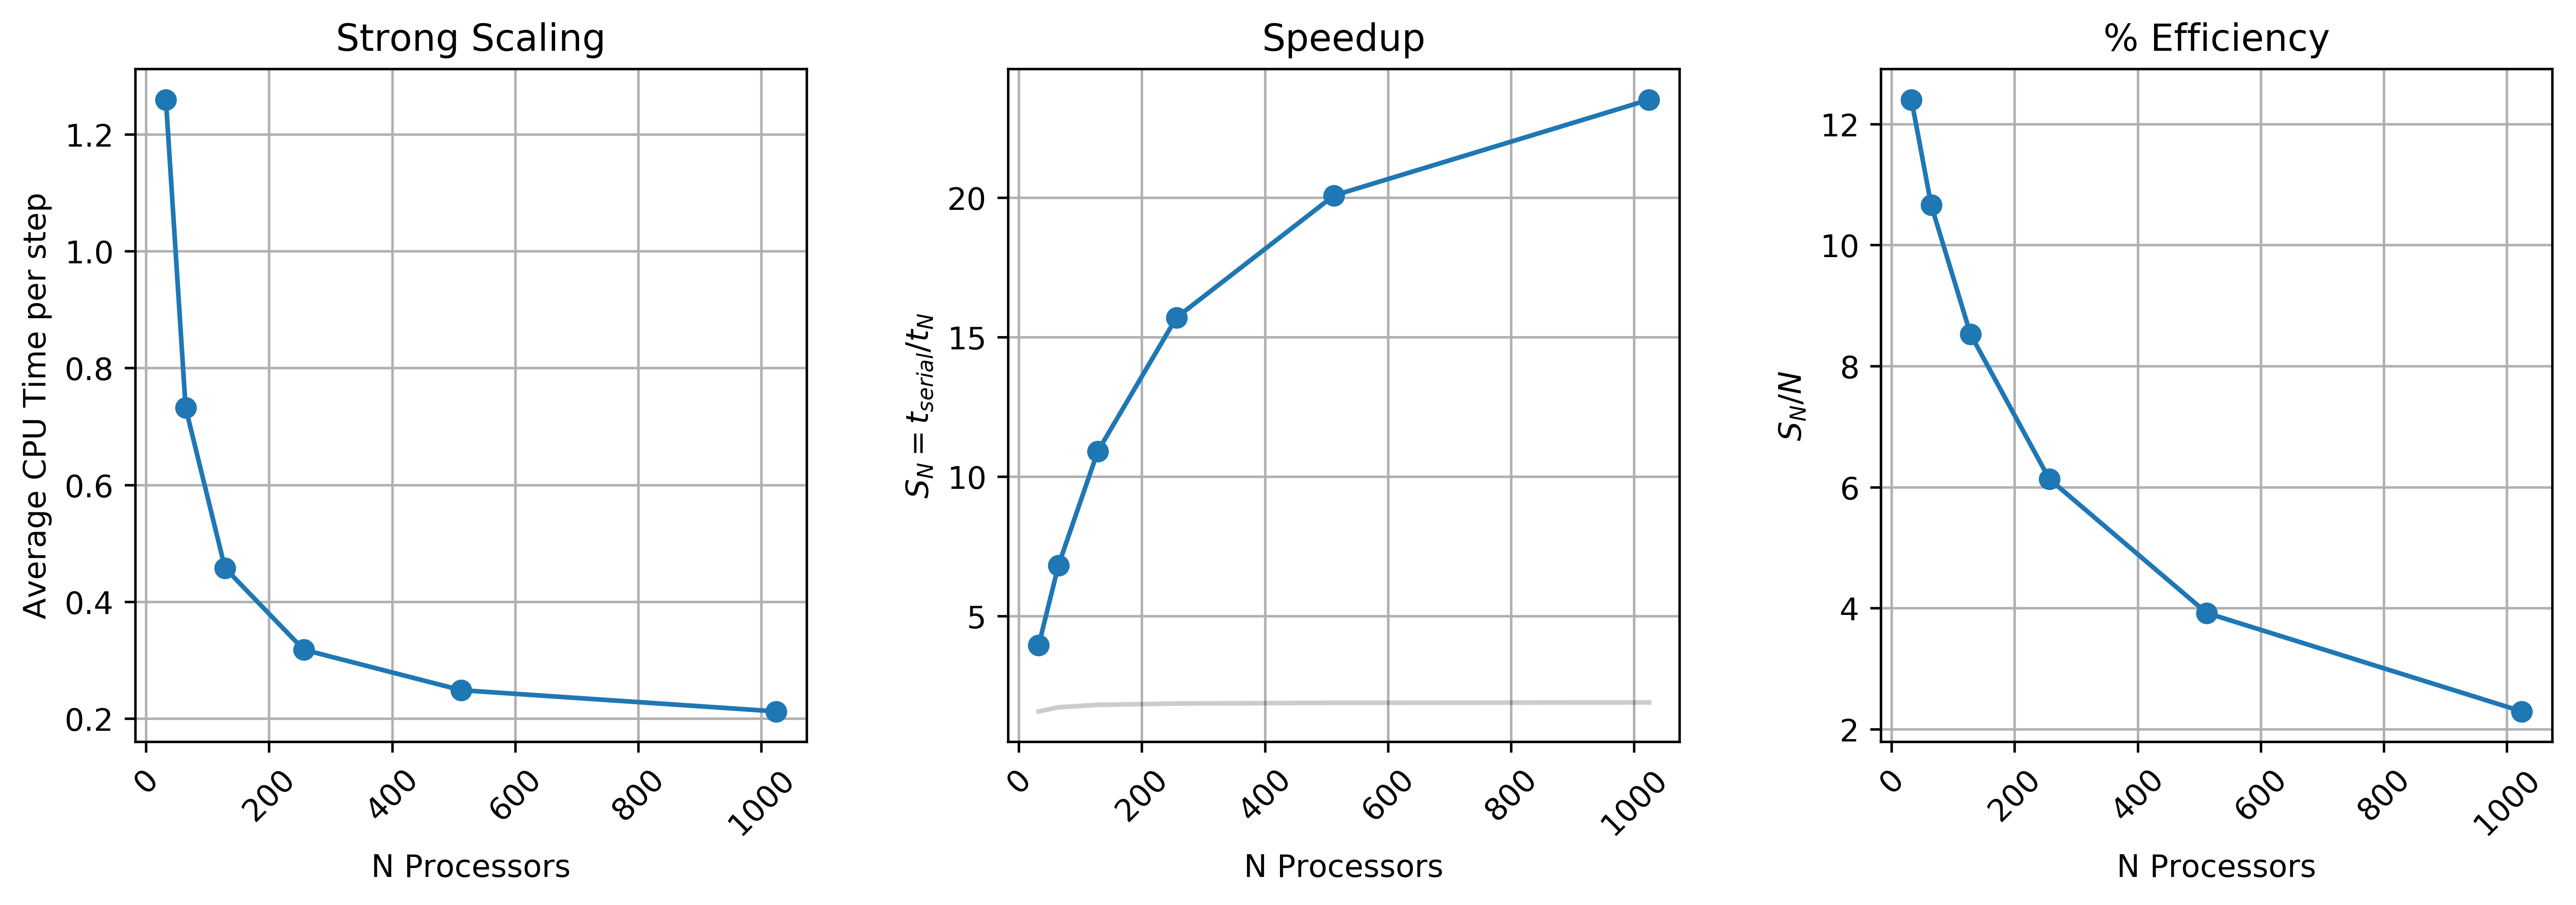

In [21]:

# strong scaling
n = np.array([32,64,128,256,512,1024]) #nnodes
tn = np.array([1.25951,0.732543,0.458026,0.318239,0.248934,0.212612]) #cpu_time
procs = n

# amount of time to complete a work unit with 1 processing element 
tserial = 5.
speedup = tserial/tn;
efficiency = speedup/procs * 100

fig, axarr = plt.subplots(1,3, figsize=(14,4), dpi=500) 
axarr[0].plot(procs,tn,'-o')
axarr[0].set_ylabel('Average CPU Time per step')
axarr[0].set_title('Strong Scaling')

p=0.5
axarr[1].plot(procs,speedup,'-o')
axarr[1].plot(procs,1./((1.-p)+p/speedup),'k-',alpha=0.2)
axarr[1].set_ylabel('$S_N = t_{serial}/t_{N}$')
axarr[1].set_title('Speedup')

axarr[2].plot(procs,efficiency,'-o')
axarr[2].set_ylabel('$S_N/N$')
axarr[2].set_title('% Efficiency')

for ax in axarr:
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('N Processors')


plt.subplots_adjust(wspace=0.3,hspace=0.5)